In [38]:
!pip install pandas matplotlib numpy xgboost scikit-learn seaborn -q

In [3]:
import os

# Unset the MPLBACKEND environment variable to avoid conflicts
if "MPLBACKEND" in os.environ:
    del os.environ["MPLBACKEND"]

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import dataset


In [ ]:
df = pd.read_csv("../data/spg.csv")
df.head()


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [6]:
df.isnull().sum().sum()


np.int64(0)

In [7]:
df.duplicated().sum()


np.int64(0)

In [8]:
df[df.duplicated()]

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw


In [9]:
df = df.drop_duplicates()

In [10]:
df.dtypes

temperature_2_m_above_gnd            float64
relative_humidity_2_m_above_gnd        int64
mean_sea_level_pressure_MSL          float64
total_precipitation_sfc              float64
snowfall_amount_sfc                  float64
total_cloud_cover_sfc                float64
high_cloud_cover_high_cld_lay          int64
medium_cloud_cover_mid_cld_lay         int64
low_cloud_cover_low_cld_lay            int64
shortwave_radiation_backwards_sfc    float64
wind_speed_10_m_above_gnd            float64
wind_direction_10_m_above_gnd        float64
wind_speed_80_m_above_gnd            float64
wind_direction_80_m_above_gnd        float64
wind_speed_900_mb                    float64
wind_direction_900_mb                float64
wind_gust_10_m_above_gnd             float64
angle_of_incidence                   float64
zenith                               float64
azimuth                              float64
generated_power_kw                   float64
dtype: object

In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float64
 12  win

In [12]:
df.columns


Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='str')

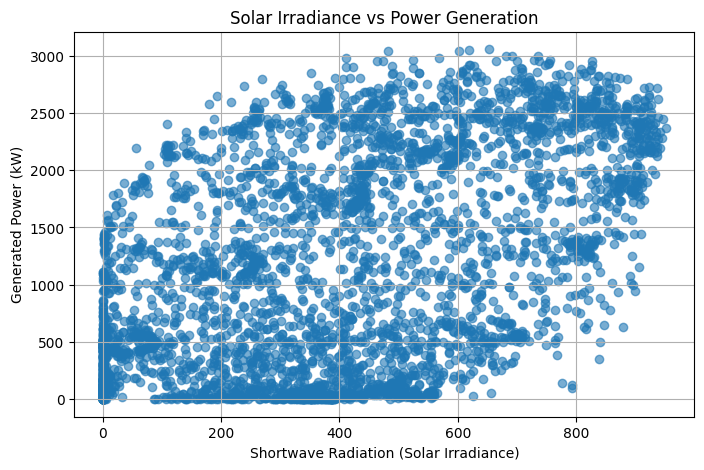

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(
    df["shortwave_radiation_backwards_sfc"], df["generated_power_kw"], alpha=0.6
)
plt.xlabel("Shortwave Radiation (Solar Irradiance)")
plt.ylabel("Generated Power (kW)")
plt.title("Solar Irradiance vs Power Generation")
plt.grid(True)

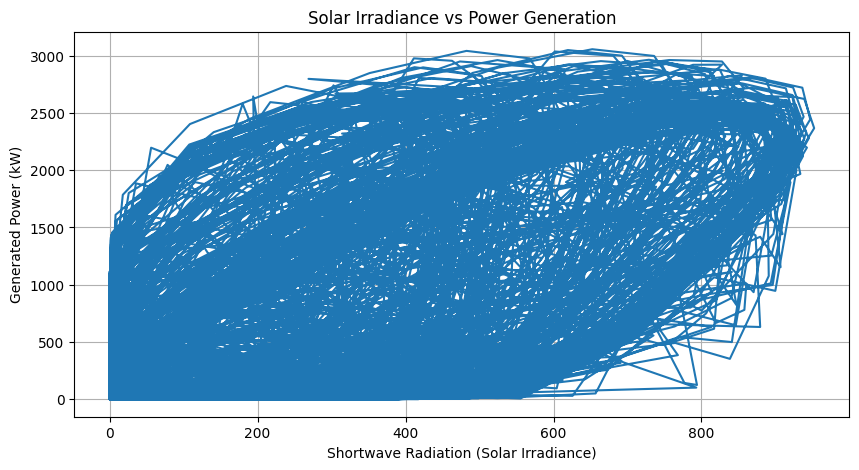

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df["shortwave_radiation_backwards_sfc"], df["generated_power_kw"])
plt.xlabel("Shortwave Radiation (Solar Irradiance)")
plt.ylabel("Generated Power (kW)")
plt.title("Solar Irradiance vs Power Generation")
plt.grid(True)

In [15]:
df["shortwave_radiation_backwards_sfc"].corr(df["generated_power_kw"])


np.float64(0.5561480473002739)

In [16]:
df.index


RangeIndex(start=0, stop=4213, step=1)

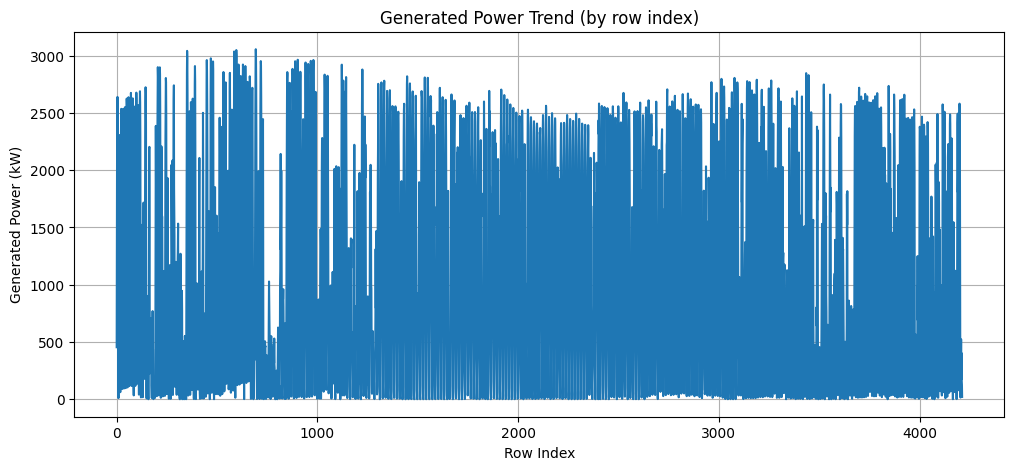

In [ ]:
# Seasonality analysis requires datetime feature, which is not present in this dataset.Below is the plot “Pseudo seasonality”
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df["generated_power_kw"])
plt.title("Generated Power Trend (by row index)")
plt.xlabel("Row Index")
plt.ylabel("Generated Power (kW)")
plt.grid(True)

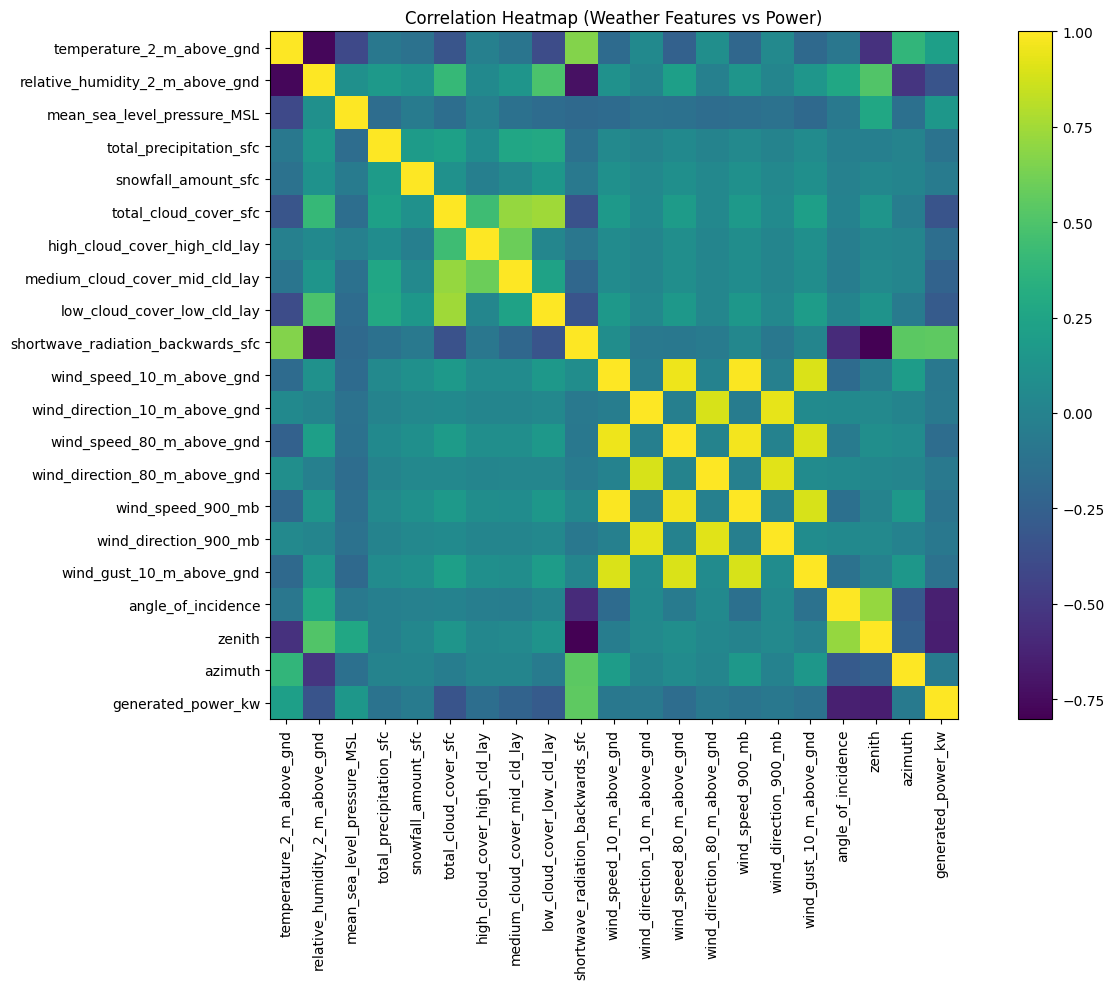

In [ ]:
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
plt.imshow(corr, interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Weather Features vs Power)")
plt.tight_layout()


Text(0.5, 1.0, 'Correlation Heatmap')

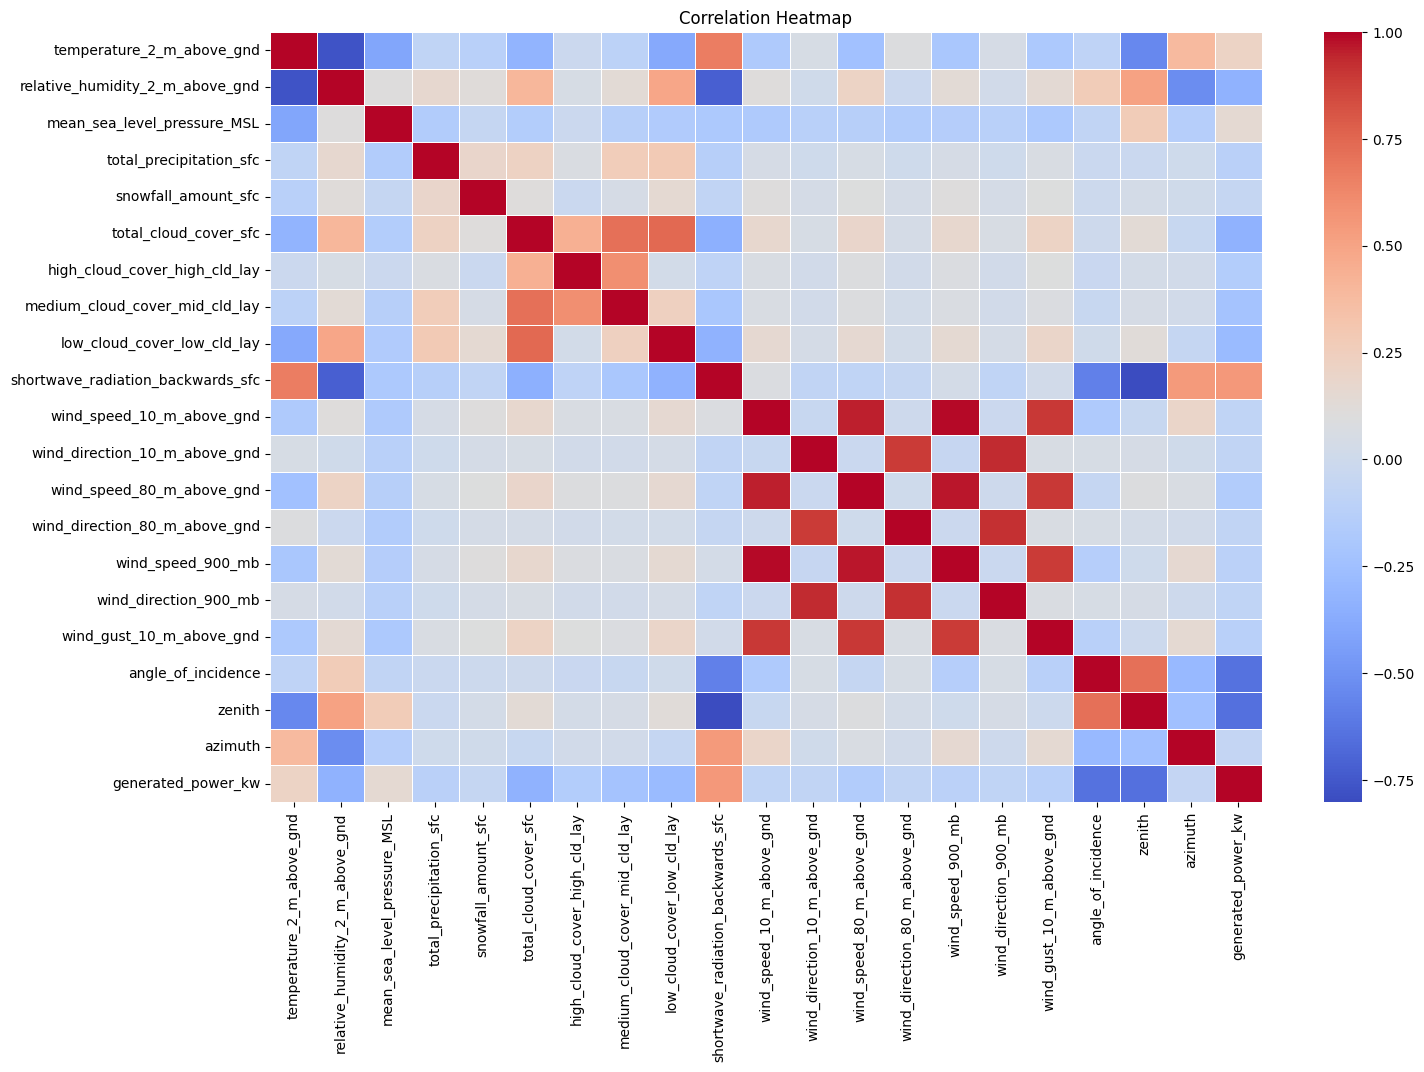

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")

In [21]:
df.corr(numeric_only=True)["generated_power_kw"].sort_values(ascending=False)


generated_power_kw                   1.000000
shortwave_radiation_backwards_sfc    0.556148
temperature_2_m_above_gnd            0.217280
mean_sea_level_pressure_MSL          0.150551
snowfall_amount_sfc                 -0.049508
azimuth                             -0.061184
wind_direction_80_m_above_gnd       -0.069941
wind_direction_10_m_above_gnd       -0.073257
wind_direction_900_mb               -0.077435
wind_speed_10_m_above_gnd           -0.083043
wind_speed_900_mb                   -0.107615
total_precipitation_sfc             -0.118442
wind_gust_10_m_above_gnd            -0.122808
high_cloud_cover_high_cld_lay       -0.147723
wind_speed_80_m_above_gnd           -0.157899
medium_cloud_cover_mid_cld_lay      -0.227834
low_cloud_cover_low_cld_lay         -0.288066
total_cloud_cover_sfc               -0.334338
relative_humidity_2_m_above_gnd     -0.336783
angle_of_incidence                  -0.646537
zenith                              -0.649991
Name: generated_power_kw, dtype: f

In [ ]:
# Checking For Time and Date Columns Exists or not for Feature Engineering
df = pd.read_csv("../data/spg.csv")
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


Timestamp column is not available in the dataset, so hour/day/month feature engineering cannot be performed.


In [ ]:
# Seperating Features and Target

from sklearn.model_selection import train_test_split

X = df.drop("generated_power_kw", axis=1)
y = df["generated_power_kw"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Converting back to Dataframe
import pandas as pd

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
# Spliting Data into Training and Testing
from sklearn.model_selection import train_test_split

X = df.drop("generated_power_kw", axis=1)
y = df["generated_power_kw"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Baseline model LinearRegression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

lr_pred = lr_model.predict(X_test_scaled)

In [ ]:
# Training ensemble model using Random Forest for better accuracy
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
# Linear Regression Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_pred)

print("Linear Regression Results:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

Linear Regression Results:
MAE : 391.79269568403134
RMSE: 507.5323218220513
R2  : 0.7180084563489013


In [33]:
# Random Forest Evaluation
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)

print("Random Forest Results:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

Random Forest Results:
MAE : 253.9763582104096
RMSE: 404.6793816834434
R2  : 0.8207204183723456


In [ ]:
# X-GBoost Training
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [44]:
# X-GBoost Evaluation
mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)

print("XGBoost Results:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

XGBoost Results:
MAE : 258.5621812384314
RMSE: 401.50494201780685
R2  : 0.8235220439953196


In [36]:
# Comparing the results of both models
print("Model Comparison:")
results = {
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mean_absolute_error(y_test, lr_pred), mean_absolute_error(y_test, rf_pred)],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, lr_pred)),
        np.sqrt(mean_squared_error(y_test, rf_pred)),
    ],
    "R2 Score": [r2_score(y_test, lr_pred), r2_score(y_test, rf_pred)],
}

pd.DataFrame(results)

Model Comparison:


,Model,MAE,RMSE,R2 Score
0,Linear Regression,391.792696,507.532322,0.718008
1,Random Forest,253.976358,404.679382,0.820720
